In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50V2, Xception
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_path = "data/train_set_undersample/"
val_path = "data/val_set_undersample/"

In [3]:
IMG_WIDTH = 124
IMG_HEIGHT = 124
BATCH_SIZE = 32

In [4]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 7296 images belonging to 15 classes.


In [5]:
validation_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input
)
validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1824 images belonging to 15 classes.


In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Ascariasis
1 : Babesia
2 : Capillaria p
3 : Enterobius v
4 : Epidermophyton floccosum
5 : Fasciolopsis buski
6 : Hookworm egg
7 : Hymenolepis diminuta
8 : Hymenolepis nana
9 : Leishmania
10 : Opisthorchis viverrine
11 : Paragonimus spp
12 : T. rubrum
13 : Taenia spp
14 : Trichuris trichiura


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


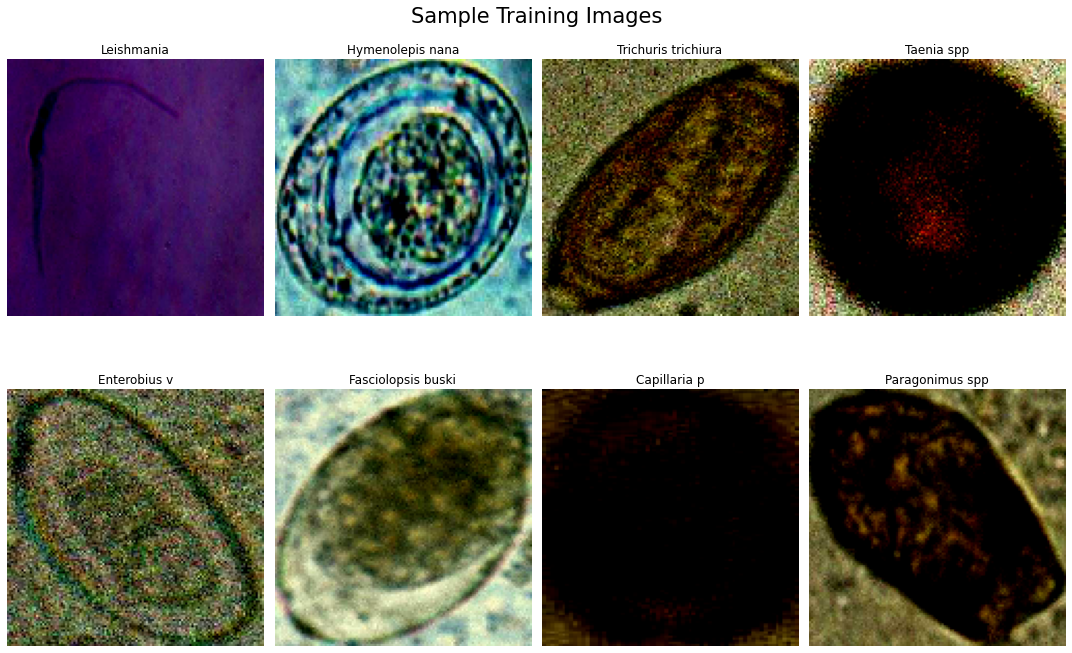

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
idx = 0

for i in range(2):
    for j in range(4):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [8]:
resnet_model = Sequential()

pretrained_model= ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    pooling='avg',
    classes=15
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

#resnet_model.add(BatchNormalization())

resnet_model.add(Flatten())

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

In [9]:
print(resnet_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24621583 (93.92 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________
None


In [10]:
resnet_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    #callbacks=EarlyStopping(
    #    monitor='val_loss',  
    #    patience=2,      
    #    restore_best_weights=True  
    #),
    verbose=1
)

Epoch 1/5
 20/228 [=>............................] - ETA: 2:44 - loss: 1.8262 - accuracy: 0.4469

In [11]:
history = resnet_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=EarlyStopping(
        monitor='val_loss',  
        patience=2,      
        restore_best_weights=True  
    ),
    verbose=1
)

Epoch 1/10
298/298 [==============================] - 893s 3s/step - loss: 0.5553 - accuracy: 0.8187 - val_loss: 0.4398 - val_accuracy: 0.8615
Epoch 2/10
298/298 [==============================] - 977s 3s/step - loss: 0.2328 - accuracy: 0.9204 - val_loss: 0.3185 - val_accuracy: 0.8963
Epoch 3/10
298/298 [==============================] - 921s 3s/step - loss: 0.1543 - accuracy: 0.9463 - val_loss: 0.3222 - val_accuracy: 0.8955
Epoch 4/10
298/298 [==============================] - 818s 3s/step - loss: 0.0954 - accuracy: 0.9678 - val_loss: 0.3252 - val_accuracy: 0.9026
Epoch 5/10
298/298 [==============================] - 924s 3s/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.2969 - val_accuracy: 0.9148
Epoch 6/10
298/298 [==============================] - 956s 3s/step - loss: 0.0495 - accuracy: 0.9840 - val_loss: 0.3221 - val_accuracy: 0.9106
Epoch 7/10
298/298 [==============================] - 937s 3s/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.3514 - val_accuracy: 0.9047

In [16]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

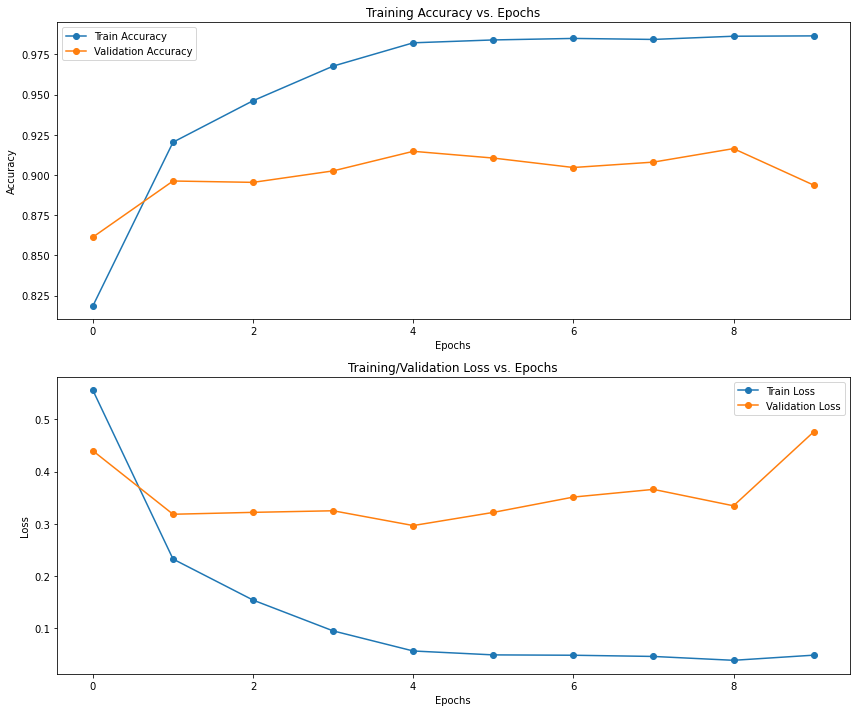

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.savefig('images/ResNet50V2 Evaluation.jpg', dpi=300, format='jpg')
plt.show()

In [17]:
resnet_model.save(f'models/ResNet50V2-{round(max(train_accuracy), 4)}ACC-{round(min(train_loss), 4)}LOSS.h5')

C:\Users\Kershrita\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Submission

In [18]:
test_data_dir = 'data/test_data'

test_image_files = natsorted([os.path.join(test_data_dir, file) for file in os.listdir(test_data_dir) if file.endswith(('jpg', 'jpeg', 'png'))])
predictions = []

for image_path in test_image_files:
    img = load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 

    img_array = tf.keras.applications.resnet_v2.preprocess_input(img_array)

    prediction = resnet_model.predict(img_array)
    predictions.append(prediction[0])  

predictions = np.array(predictions)

submission_df = pd.DataFrame(predictions, columns=['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14'])

submission_df['image_name'] = [os.path.basename(file) for file in test_image_files]
submission_df = submission_df[['image_name', 'class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14']]

1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 168ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 261ms/step


1/1 [==============================] - 0s 298ms/step


1/1 [==============================] - 0s 411ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 193ms/step


1/1 [==============================] - 0s 203ms/step


1/1 [==============================] - 0s 218ms/step


1/1 [==============================] - 0s 225ms/step


1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 248ms/step


1/1 [==============================] - 0s 254ms/step


1/1 [==============================] - 0s 260ms/step


In [19]:
submission_df.to_csv('data/ResNet_Submission.csv', index=False)

## Xception

In [4]:
xtrain_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input
)
xtrain_generator = xtrain_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 9528 images belonging to 15 classes.


In [5]:
xvalidation_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input
)
xvalidation_generator = xvalidation_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2382 images belonging to 15 classes.


In [6]:
labels = {value: key for key, value in xtrain_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Ascariasis
1 : Babesia
2 : Capillaria p
3 : Enterobius v
4 : Epidermophyton floccosum
5 : Fasciolopsis buski
6 : Hookworm egg
7 : Hymenolepis diminuta
8 : Hymenolepis nana
9 : Leishmania
10 : Opisthorchis viverrine
11 : Paragonimus spp
12 : T. rubrum
13 : Taenia spp
14 : Trichuris trichiura


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


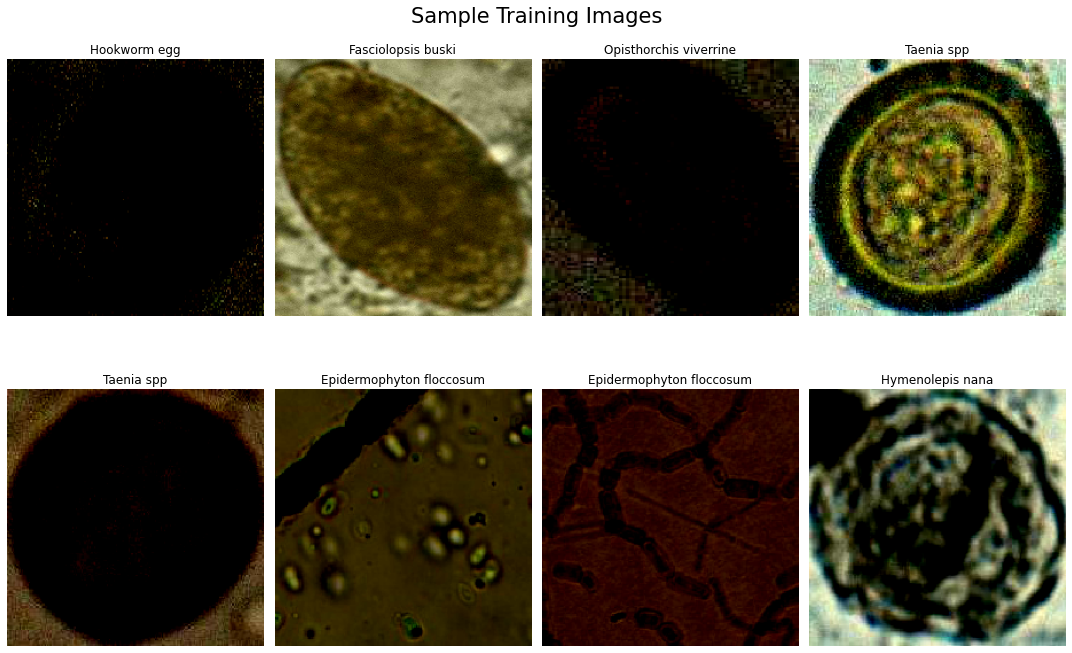

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
idx = 0

for i in range(2):
    for j in range(4):
        label = labels[np.argmax(xtrain_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(xtrain_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [8]:
xception_model = Sequential()

pretrained_model= tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    pooling='avg',
    classes=15
)

for layer in pretrained_model.layers:
        layer.trainable=False

xception_model.add(pretrained_model)
xception_model.add(Flatten())
xception_model.add(Dense(512, activation='relu'))
xception_model.add(Dense(15, activation='softmax'))

In [9]:
print(xception_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 21918263 (83.61 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
None


In [10]:
xception_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
xhistory = xception_model.fit(
    xtrain_generator,
    validation_data=xvalidation_generator,
    callbacks=EarlyStopping(
        monitor='val_loss',  
        patience=3,      
        restore_best_weights=True  
    ),
    epochs=5
)

Epoch 1/5
298/298 [==============================] - 797s 3s/step - loss: 0.6003 - accuracy: 0.8024 - val_loss: 0.4157 - val_accuracy: 0.8581
Epoch 2/5
298/298 [==============================] - 802s 3s/step - loss: 0.2792 - accuracy: 0.9019 - val_loss: 0.3445 - val_accuracy: 0.8808
Epoch 3/5
298/298 [==============================] - 778s 3s/step - loss: 0.1885 - accuracy: 0.9349 - val_loss: 0.3175 - val_accuracy: 0.8917
Epoch 4/5
298/298 [==============================] - 805s 3s/step - loss: 0.1449 - accuracy: 0.9492 - val_loss: 0.3157 - val_accuracy: 0.8950
Epoch 5/5
298/298 [==============================] - 833s 3s/step - loss: 0.1070 - accuracy: 0.9631 - val_loss: 0.3046 - val_accuracy: 0.9043


In [12]:
xtrain_accuracy = xhistory.history['accuracy']
xval_accuracy = xhistory.history['val_accuracy']

xtrain_loss = xhistory.history['loss']
xval_loss = xhistory.history['val_loss']

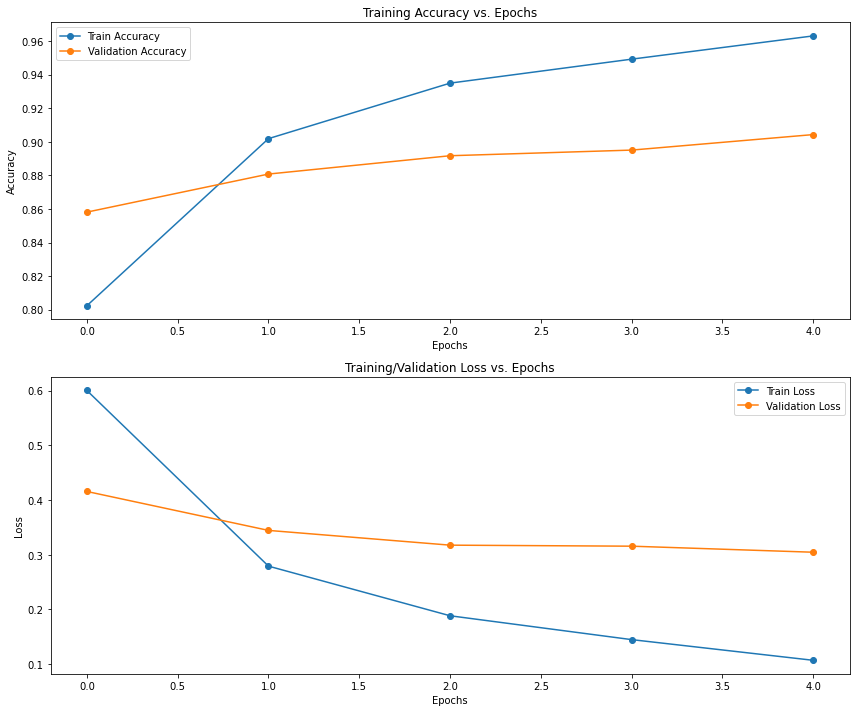

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(xtrain_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(xval_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(xtrain_loss, 'o-', label='Train Loss')
ax[1].plot(xval_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.savefig('images/Xception Evaluation.jpg', dpi=300, format='jpg')
plt.show()

In [14]:
xception_model.save(f'models/XCEPTION-{round(max(xtrain_accuracy), 4)}ACC-{round(min(xtrain_loss), 4)}LOSS.h5')

C:\Users\Kershrita\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Submission

In [17]:
test_data_dir = 'data/test_data'

test_image_files = natsorted([os.path.join(test_data_dir, file) for file in os.listdir(test_data_dir) if file.endswith(('jpg', 'jpeg', 'png'))])
predictions = []

for image_path in test_image_files:
    img = load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 

    img_array = tf.keras.applications.xception.preprocess_input(img_array)

    prediction = xception_model.predict(img_array)
    predictions.append(prediction[0])  

predictions = np.array(predictions)

submission_df = pd.DataFrame(predictions, columns=['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14'])

submission_df['image_name'] = [os.path.basename(file) for file in test_image_files]
submission_df = submission_df[['image_name', 'class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14']]

1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 153ms/step


In [18]:
submission_df.to_csv('data/Xception_Submission.csv', index=False)